# Generate simulated data set

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Reading 2-month sonar time series
import h5py

MVBS_path = '/media/wu-jung/wjlee_apl_2/ooi_zplsc_new/'
MVBS_fname = '20150817-20151017_MVBS.h5'

f = h5py.File(os.path.join(MVBS_path,MVBS_fname),"r")
MVBS = np.array(f['MVBS'])
depth_bin_size = np.array(f['depth_bin_size'])
ping_time = np.array(f['ping_time'])
f.close()

In [3]:
ping_per_day_mvbs = 144

In [4]:
depth_bin_num = MVBS.shape[1]-3

In [263]:
day_num = 60

## Pattern 1: DVM

In [79]:
# DVM baseline
x = np.linspace(-np.pi/2, np.pi/2*3, ping_per_day_mvbs)
dvm_depth_base = (-np.sin(x)-1)/2*depth_bin_num

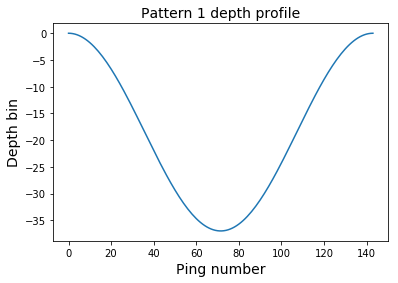

In [302]:
plt.plot(dvm_depth_base)
plt.xlabel('Ping number',fontsize=14)
plt.ylabel('Depth bin',fontsize=14)
plt.title('Pattern 1 depth profile',fontsize=14)
plt.show()

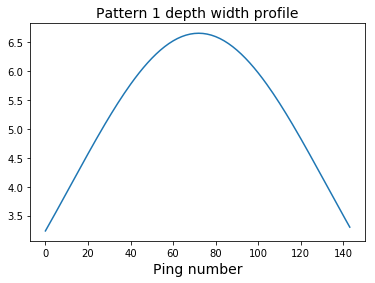

In [572]:
# DVM vertical width
from scipy.stats import norm
# vert_w = np.array([5]*ping_per_day_mvbs)
vert_w = norm.pdf(np.arange(ping_per_day_mvbs),loc=ping_per_day_mvbs/2,scale=60)*1000

plt.plot(vert_w)
plt.xlabel('Ping number',fontsize=14)
plt.title('Pattern 1 depth width profile',fontsize=14)
plt.show()

In [573]:
# Generate Pattern 1
x_depth = -np.arange(depth_bin_num)
p1 = np.empty((depth_bin_num,ping_per_day_mvbs))
for (iter_p,iter_d,iter_w) in zip(range(ping_per_day_mvbs),dvm_depth_base,vert_w):
    tmp = norm.pdf(x_depth,loc=iter_d,scale=iter_w)
    p1[:,iter_p] = tmp/tmp.max()

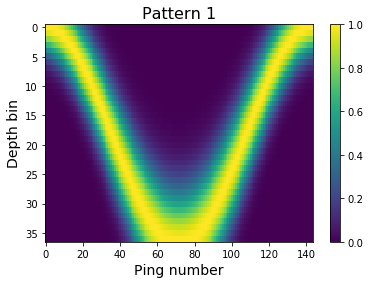

In [574]:
plt.imshow(p1,aspect='auto')
plt.colorbar()
plt.title('Pattern 1',fontsize=16)
plt.xlabel('Ping number',fontsize=14)
plt.ylabel('Depth bin',fontsize=14)
plt.show()

In [575]:
# Madulation for Pattern 1
x_day = np.linspace(-np.pi, np.pi, 20*144)
tmp_change = np.cos(x_day)+1
p1_mod = np.concatenate((tmp_change[10*144:]/2,[0]*10*144,\
                            tmp_change[:10*144],[2]*5*144,tmp_change[10*144:],tmp_change[:10*144]/4,[0.5]*5*144))
p1_mod = p1_mod/p1_mod.max()

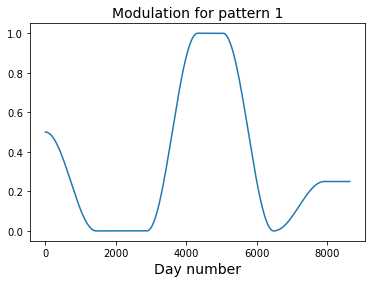

In [576]:
plt.plot(p1_mod)
plt.xlabel('Day number',fontsize=14)
plt.title('Modulation for pattern 1',fontsize=14)
plt.show()

In [577]:
# Generate modulated Pattern 1
p1_alldays = np.array([p1]*day_num)
p1_alldays = p1_alldays.swapaxes(0,1).reshape((37,-1))  # all days with same amplitude
p1_alldays = p1_alldays*p1_mod.T  # modulate DVM strength

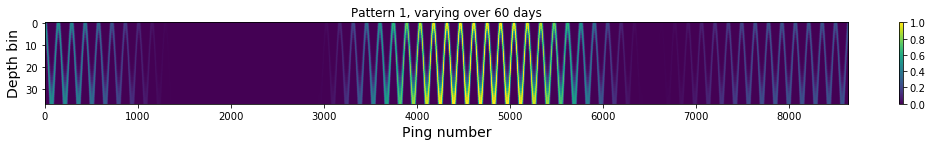

In [578]:
plt.figure(figsize=(18,1.5))
plt.imshow(p1_alldays,aspect='auto')
plt.xlabel('Ping number',fontsize=14)
plt.ylabel('Depth bin',fontsize=14)
plt.title('Pattern 1, varying over 60 days')
plt.colorbar()
plt.show()

## Pattern 2: Sub-surface layer

In [579]:
# Depth profile for Pattern 2
ssl_len = 8  # persistence length of Pattern 2 [#days]
ssl_depth_base = norm.pdf(np.arange(ping_per_day_mvbs*day_num),loc=ssl_len*ping_per_day_mvbs,scale=7*ping_per_day_mvbs)
ssl_depth_base[:ssl_len*ping_per_day_mvbs] = ssl_depth_base.max()
ssl_depth_base = (ssl_depth_base/ssl_depth_base.max()-1)*8

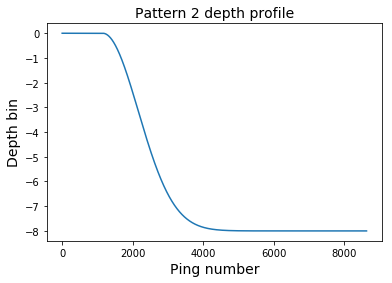

In [580]:
plt.plot(ssl_depth_base)
plt.xlabel('Ping number',fontsize=14)
plt.ylabel('Depth bin',fontsize=14)
plt.title('Pattern 2 depth profile',fontsize=14)
plt.show()

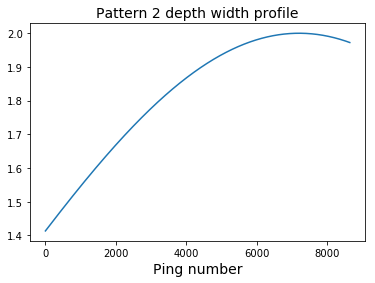

In [699]:
# DVM vertical width
# vert_w_p2 = np.array([5]*ping_per_day_mvbs)
vert_w_p2 = norm.pdf(np.arange(ping_per_day_mvbs*day_num),loc=50*ping_per_day_mvbs,scale=60*ping_per_day_mvbs)
vert_w_p2 = vert_w_p2/vert_w_p2.max()*2
plt.plot(vert_w_p2)
plt.xlabel('Ping number',fontsize=14)
plt.title('Pattern 2 depth width profile',fontsize=14)
plt.show()

In [700]:
# Generate Pattern 2
p2 = np.empty((depth_bin_num,ping_per_day_mvbs*day_num))
for (iter_p,iter_d,iter_w) in zip(range(ping_per_day_mvbs*day_num),ssl_depth_base,vert_w_p2):
    tmp = norm.pdf(x_depth,loc=iter_d,scale=iter_w)
    if tmp.max()==0:
        p2[:,iter_p] = tmp
    else:
        p2[:,iter_p] = tmp/tmp.max()

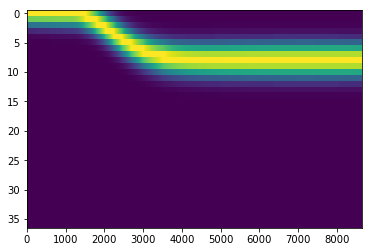

In [701]:
plt.imshow(p2,aspect='auto')

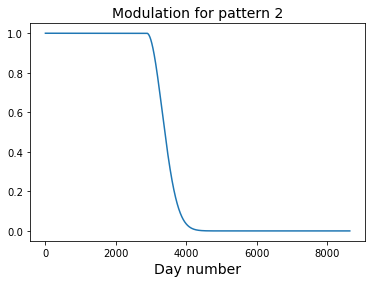

In [702]:
# Modulation for Pattern 2
p2_len = 20  # persistant length for pattern 2 [days]
p2_mod = norm.pdf(np.arange(ping_per_day_mvbs*day_num),loc=p2_len*ping_per_day_mvbs,scale=3*ping_per_day_mvbs)
p2_mod[:p2_len*ping_per_day_mvbs] = p2_mod.max()
p2_mod = p2_mod/p2_mod.max()

plt.plot(p2_mod)
plt.xlabel('Day number',fontsize=14)
plt.title('Modulation for pattern 2',fontsize=14)
plt.show()

In [703]:
# Generate modulated Pattern 2
p2_alldays = p2*p2_mod.T  # modulate SSL strength

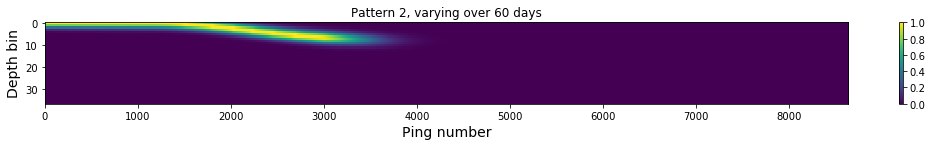

In [704]:
plt.figure(figsize=(18,1.5))
plt.imshow(p2_alldays,aspect='auto')
plt.xlabel('Ping number',fontsize=14)
plt.ylabel('Depth bin',fontsize=14)
plt.title('Pattern 2, varying over 60 days')
plt.colorbar()
plt.show()

## Generate simulated data for 3 freq

In [705]:
# Stack pattern 1 to simulate 3 freq
dyn_range = 4

p1_alldays_3freq = np.stack([p1_alldays*(10.**(dyn_range+1.0)),\
                             p1_alldays*(10.**(dyn_range+1.5)),\
                             p1_alldays*(10.**(dyn_range+1.6))],axis=0)  # +1 to prevent log10(0)
p2_alldays_3freq = np.stack([p2_alldays*(10.**dyn_range),\
                             p2_alldays*(10.**(dyn_range+1.8)),\
                             p2_alldays*(10.**(dyn_range+2.0))],axis=0)

p1_alldays_3freq_dB = 10*np.log10(p1_alldays_3freq+1)
p2_alldays_3freq_dB = 10*np.log10(p2_alldays_3freq+1)

p1_p2_combine_3freq = p1_alldays_3freq+p2_alldays_3freq
p1_p2_combine_3freq_dB = 10*np.log10(p1_p2_combine_3freq+1)

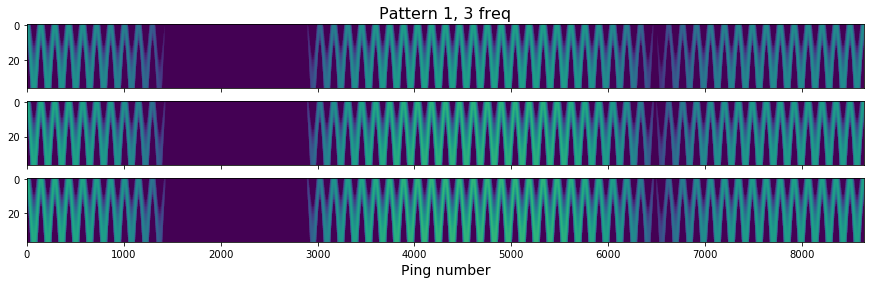

In [706]:
fig,ax = plt.subplots(3,1,figsize=(15,4),sharex=True)
ax[0].imshow(p1_alldays_3freq_dB[0,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[1].imshow(p1_alldays_3freq_dB[1,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[2].imshow(p1_alldays_3freq_dB[2,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[0].set_title('Pattern 1, 3 freq',fontsize=16)
ax[2].set_xlabel('Ping number',fontsize=14)
plt.show()

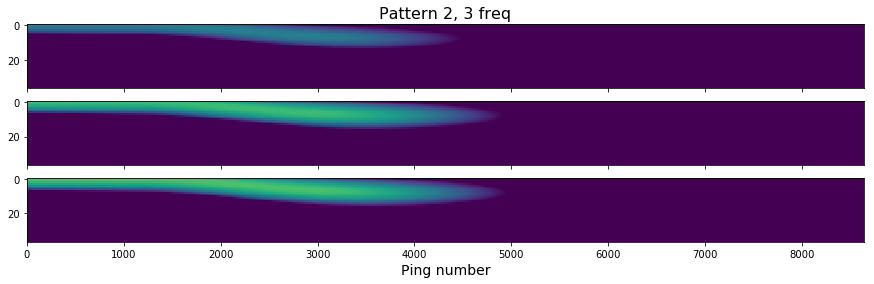

In [707]:
fig,ax = plt.subplots(3,1,figsize=(15,4),sharex=True)
ax[0].imshow(p2_alldays_3freq_dB[0,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[1].imshow(p2_alldays_3freq_dB[1,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[2].imshow(p2_alldays_3freq_dB[2,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[0].set_title('Pattern 2, 3 freq',fontsize=16)
ax[2].set_xlabel('Ping number',fontsize=14)
plt.show()

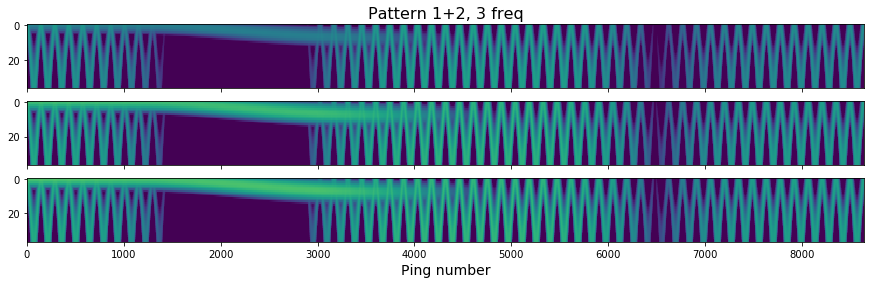

In [708]:
fig,ax = plt.subplots(3,1,figsize=(15,4),sharex=True)
ax[0].imshow(p1_p2_combine_3freq_dB[0,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[1].imshow(p1_p2_combine_3freq_dB[1,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[2].imshow(p1_p2_combine_3freq_dB[2,:,:],\
             aspect='auto',vmin=10,vmax=80)
ax[0].set_title('Pattern 1+2, 3 freq',fontsize=16)
ax[2].set_xlabel('Ping number',fontsize=14)
plt.show()

## Save simulated data

In [710]:
import h5py
simy_path = '/media/wu-jung/wjlee_apl_2/ooi_zplsc_new/'
simu_fname = 'simulated_p1_p2_combine.h5'

f = h5py.File(os.path.join(simy_path,simu_fname),"w")
f.create_dataset("p1_alldays_3freq", data=p1_alldays_3freq)
f.create_dataset("p2_alldays_3freq", data=p2_alldays_3freq)
f.create_dataset("p1_p2_combine_3freq", data=p1_p2_combine_3freq)
f.create_dataset("p1_alldays_3freq_dB", data=p1_alldays_3freq_dB)
f.create_dataset("p2_alldays_3freq_dB", data=p2_alldays_3freq_dB)
f.create_dataset("p1_p2_combine_3freq_dB", data=p1_p2_combine_3freq_dB)
f.create_dataset("ping_time", data=ping_time)
f.create_dataset("depth_bin_size",data=depth_bin_size)
f.create_dataset("ping_per_day_mvbs",data=ping_per_day_mvbs)
f.close()